In [4]:
num_qubits = 3
state = psr.circuit_qsun(np.ones((3*num_qubits)), num_qubits).amplitude


sigma = state @ np.transpose(np.conjugate(state))
# from FPGA emulator
state_qft = utilities.read_complex_numbers(f'./data/psr/FPGA_FX24/circuit_Output_{num_qubits}_qubit.txt')
rho = state_qft @ np.transpose(np.conjugate(state_qft)) 
print(np.inner(state, state_qft))

0
1
2
(0.6430050661001205-0.29288094921110275j)


In [17]:
state2 = qft.qft_Qsun_verify(3)

In [13]:
utilities.read_complex_numbers(f'./data/psr/FPGA_FX24/circuit_Output_{3}_qubit.txt')

array([0.196422-0.293968j, 0.196422-0.262718j, 0.346759-0.068975j,
       0.346759-0.068975j, 0.346759+0.068974j, 0.346759+0.068974j,
       0.196424+0.293967j, 0.196424+0.293967j])

In [23]:
fidelities_fp32 = []
for num_qubits in range(3, 18):
    print(num_qubits)
    # From simulator
    # state = psr.circuit_qsun(np.ones((3*num_qubits)), num_qubits).amplitude
    state = qft.qft_Qsun_verify(num_qubits)
    # state = np.expand_dims(state, axis=1)
    # sigma = state @ np.transpose(np.conjugate(state))
    # from FPGA emulator
    state_qft = utilities.read_complex_numbers(f'./data/qft/FPGA_FP32/QFT_Output_{num_qubits}_qubit.txt')
    # state_qft = np.expand_dims(state_qft, axis=1)
    # rho = state_qft @ np.transpose(np.conjugate(state_qft))
    # fidelities.append(metric.compilation_trace_fidelity(rho, sigma))
    fidelities_fp32.append(np.real(np.inner(state, state_qft)))

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


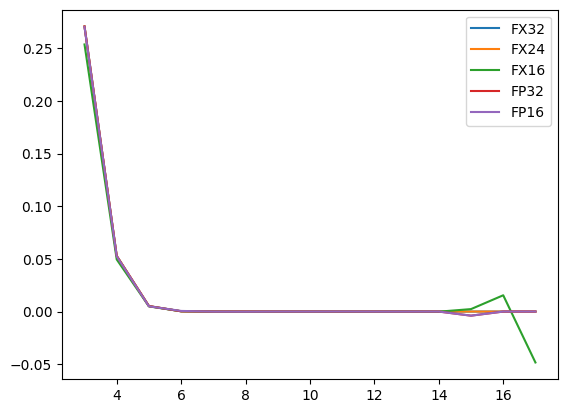

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(3, 18), fidelities32, label = 'FX32')
plt.plot(range(3, 18), fidelities24, label = 'FX24')
plt.plot(range(3, 18), fidelities16, label = 'FX16')
plt.plot(range(3, 18), fidelities_fp32, label = 'FP32')
plt.plot(range(3, 18), fidelities_fp16, label = 'FP16')
plt.legend()

In [6]:
from problem import psr
import numpy as np
import time
%load_ext autoreload
%autoreload 2
cost_funcs = [psr.cost_Qsun, psr.cost_ProjectQ, psr.cost_Qiskit, psr.cost_Pennylane]
packages = ['Qsun', 'ProjectQ', 'Qiskit', 'Pennylane']
server = 'cad114'
num_qubits = 5
num_repeats = 100
for j, package in enumerate(packages):
    print(f'-- Package: {package} --')
    timess = []
    timess_std = []
    for num_qubit in range(3, num_qubits + 1):
        times = []
        for _ in range(num_repeats):
            start = time.time()
            params = np.ones((3*num_qubit,))
            diff = psr.psr(cost_funcs[j], params)
            end = time.time()
            times.append(end-start)
        timess.append(np.mean(times))
        timess_std.append(np.std(times))
    np.savetxt(f'./time/psr/psr_{package}_{server}_Time.txt', timess)
    np.savetxt(f'./time/psr/psr_{package}_{server}_TimeSTD.txt', timess_std)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
-- Package: Qsun --
-- Package: ProjectQ --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This i

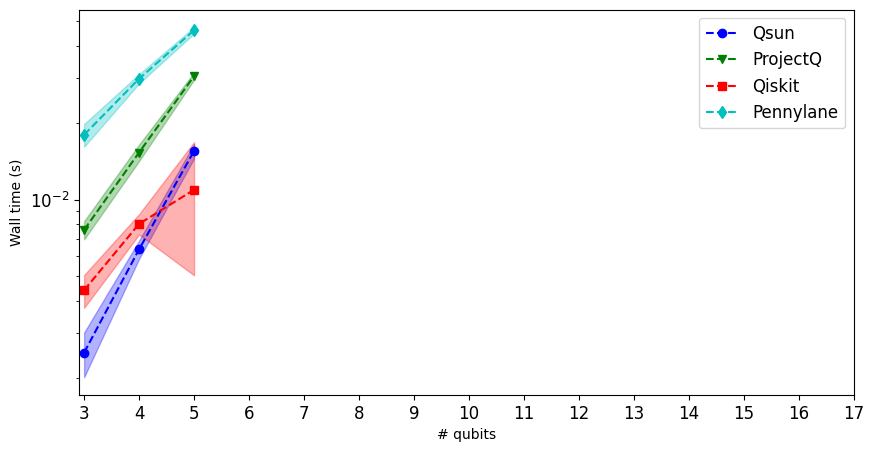

In [15]:
import matplotlib.pyplot as plt

packages = ['Qsun', 'ProjectQ', 'Qiskit', 'Pennylane']
line_stype = ['o--', 'v--', 's--', 'd--']
colors = ['b', 'g', 'r', 'c']
plt.figure(figsize=(10, 5))
for j, package in enumerate(packages):
    times = np.loadtxt(f'./time/psr/psr_{package}_{server}_Time.txt')
    plt.plot(range(3, num_qubits + 1), times, line_stype[j], color = colors[j], label=package)
    times_std = np.loadtxt(f'./time/psr/psr_{package}_{server}_TimeSTD.txt')
    plt.fill_between(range(3, num_qubits + 1), np.array(times) - np.array(times_std), np.array(times) + np.array(times_std), alpha=0.3, color=colors[j])
# times_FQsun = []
# for i in range(num_qubits):
#     times_FQsun.append(4*(2**i)*(10**(-8)))

# plt.plot(times_FQsun, label='FQsun (based on simulation)')
plt.xticks(range(3, 18), fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.xlabel('# qubits')
plt.legend(fontsize=12)
plt.ylabel('Wall time (s)')
plt.show()
# plt.savefig('compare_time_QCD_projectq.png')